# **Project Overview**

This project focuses on augmented data generation using the Obesity dataset. After importing and preprocessing the data, which includes encoding categorical variables and scaling numerical features for optimal clustering, clusters are identified and visualized using KMeans. augmented data is generated based on these clusters to augment the original dataset. Evaluation metrics such as silhouette scores assess clustering quality before and after augmented data generation. The project aims to provide insights into cluster patterns and support decision-making based on both original and augmented data perspectives.

#### **Importing Libraries and Loading Data**

First, we import necessary libraries such as Pandas, NumPy, and scikit-learn modules. We also load the dataset 'ObesityDataSet.csv' into a Pandas DataFrame and perform initial data exploration.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans


In [23]:
data = pd.read_csv('ObesityDataSet.csv')

print("Data Information :\n")
data.info()

print("\n\nNull Values :")
print(data.isna().sum())

categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("\n\nCategorial Columns :")
print(categorical_columns)

label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col + '_encoded'] = label_encoder.fit_transform(data[col])

data = data.drop(columns=categorical_columns)
print("\n\nData After Encoding :")
data

Data Information :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF           

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_encoded,family_history_with_overweight_encoded,FAVC_encoded,CAEC_encoded,SMOKE_encoded,SCC_encoded,CALC_encoded,MTRANS_encoded,NObeyesdad_encoded
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,0,1,0,2,0,0,3,3,1
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,0,1,0,2,1,1,2,3,1
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1,1,0,2,0,0,1,3,1
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,1,0,0,2,0,0,1,4,5
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,1,0,0,2,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,0,1,1,2,0,0,2,3,4
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,0,1,1,2,0,0,2,3,4
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,0,1,1,2,0,0,2,3,4
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,0,1,1,2,0,0,2,3,4


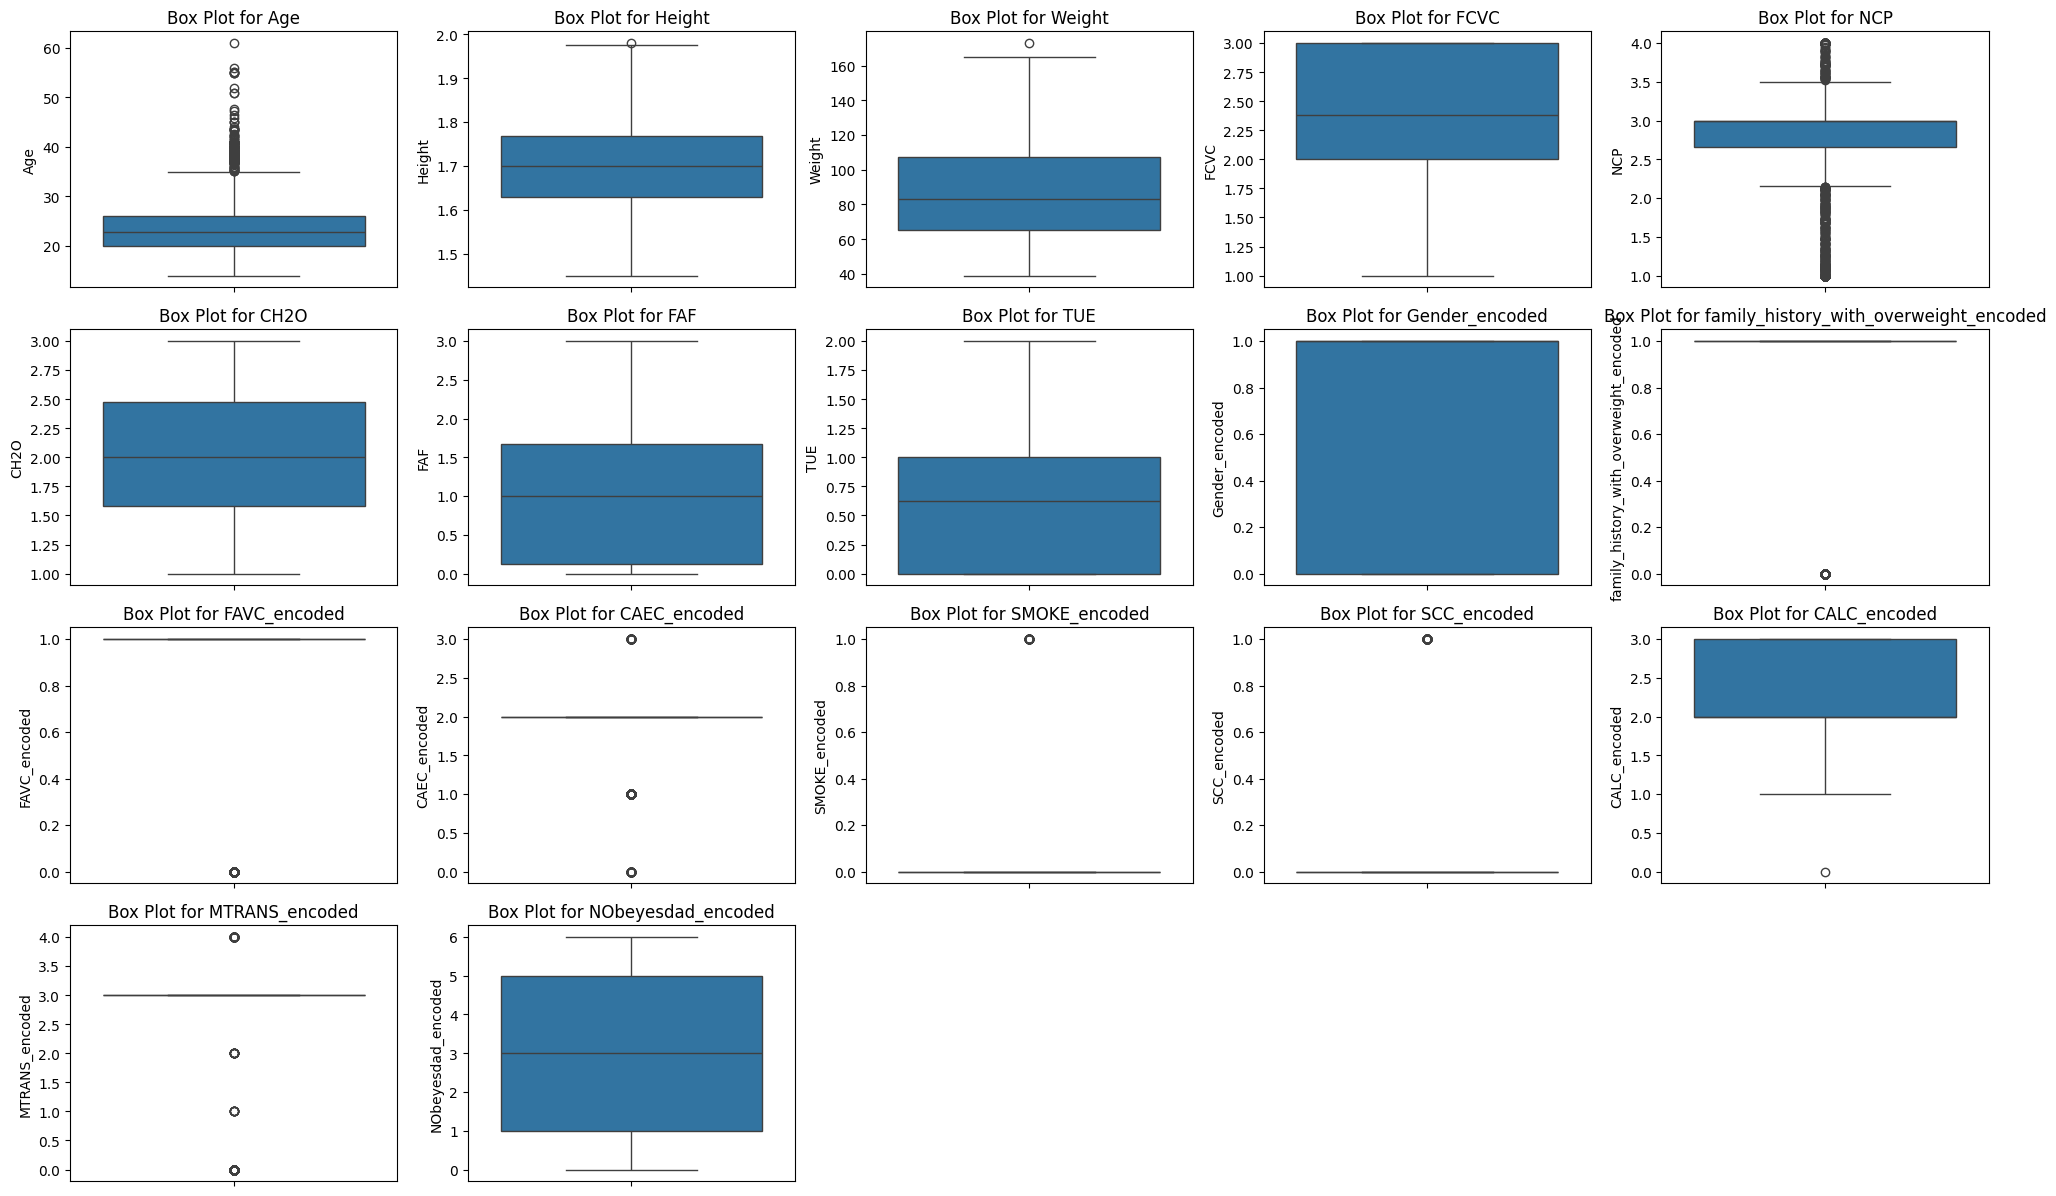

In [24]:
plt.figure(figsize=(20, 15))

for i, feature in enumerate(data.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(data[feature])
    plt.title(f'Box Plot for {feature}')
    
plt.tight_layout()
plt.show()

#### **Status**
- The Data doesn't have any NULL values
- And also categorial columns are encoded using label encoder

#### **Feature Importance Analysis**

To understand which features are most influential for predicting obesity levels, we use a Random Forest Classifier to compute feature importances. The top features are then visualized using a bar plot.


In [25]:
data['Age'] = data['Age'].astype(int)
data.dtypes


Age                                         int32
Height                                    float64
Weight                                    float64
FCVC                                      float64
NCP                                       float64
CH2O                                      float64
FAF                                       float64
TUE                                       float64
Gender_encoded                              int32
family_history_with_overweight_encoded      int32
FAVC_encoded                                int32
CAEC_encoded                                int32
SMOKE_encoded                               int32
SCC_encoded                                 int32
CALC_encoded                                int32
MTRANS_encoded                              int32
NObeyesdad_encoded                          int32
dtype: object

In [26]:
X = data.drop(columns=['NObeyesdad_encoded'])
y = data['NObeyesdad_encoded']

#### **Feature Importance Analysis**

To understand which features are most influential for predicting obesity levels, we use a Random Forest Classifier to compute feature importances. The top features are then visualized using a bar plot.


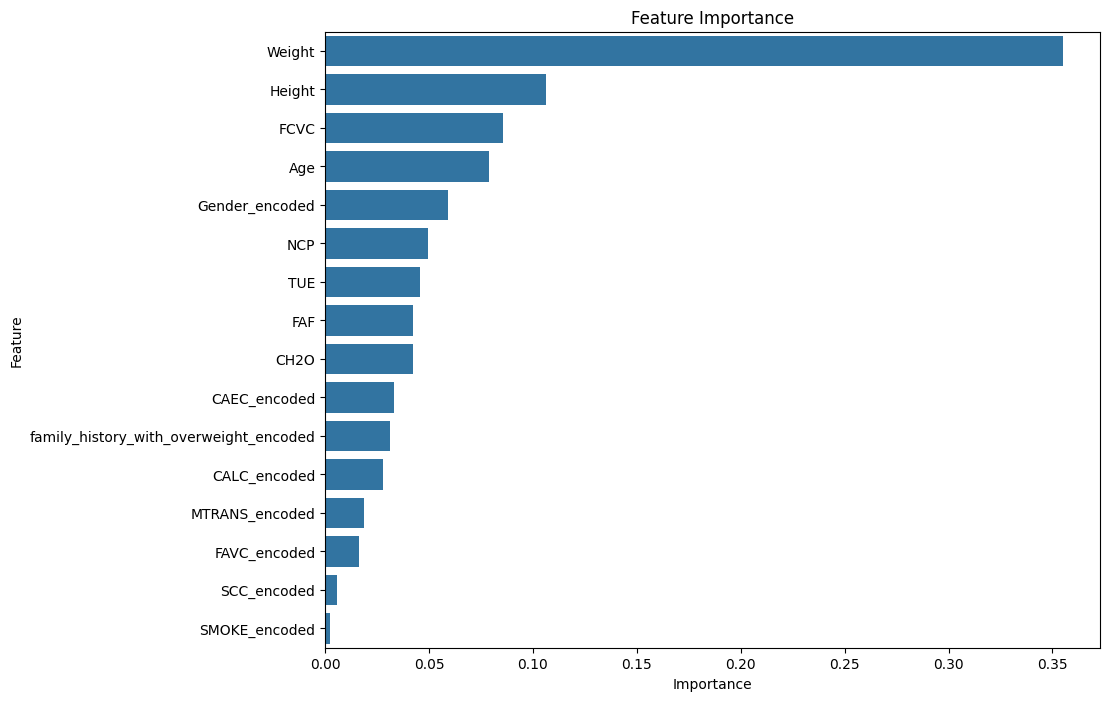

In [27]:
def plot_feature_importance(X, y):
    rf_classifier = RandomForestClassifier(random_state=42)
    rf_classifier.fit(X, y)
    
    importances = rf_classifier.feature_importances_
    feature_names = X.columns
    
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()

    return feature_importance_df

feature_importance_df = plot_feature_importance(X, y)

#### **Determining Optimal Number of Clusters**

Using the Elbow Method, we determine the optimal number of clusters for KMeans clustering based on the scaled top features. This helps in identifying distinct groups within the data.


Top 7 features: 2            Weight
1            Height
3              FCVC
0               Age
8    Gender_encoded
4               NCP
7               TUE
Name: Feature, dtype: object


c:\Users\LOKESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LOKESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LOKESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\LOKESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

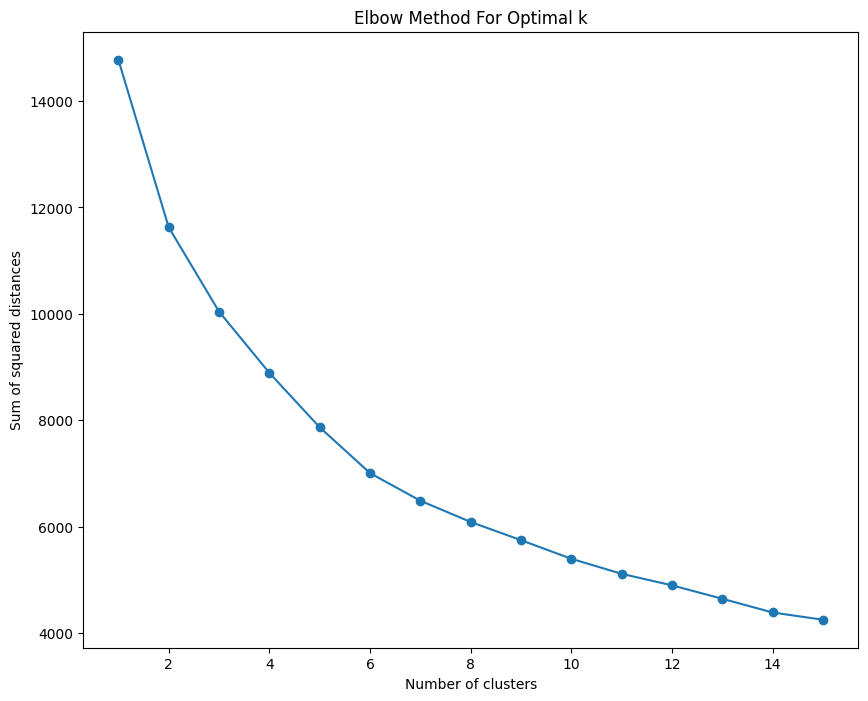

In [28]:
def plot_elbow_method(X, max_k=15):
    sse = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.title('Elbow Method For Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared distances')
    plt.show()
    
top_7_features = feature_importance_df['Feature'].head(7)
print("Top 7 features:", top_7_features)

X_top_7 = X[top_7_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top_7)

plot_elbow_method(X_scaled)

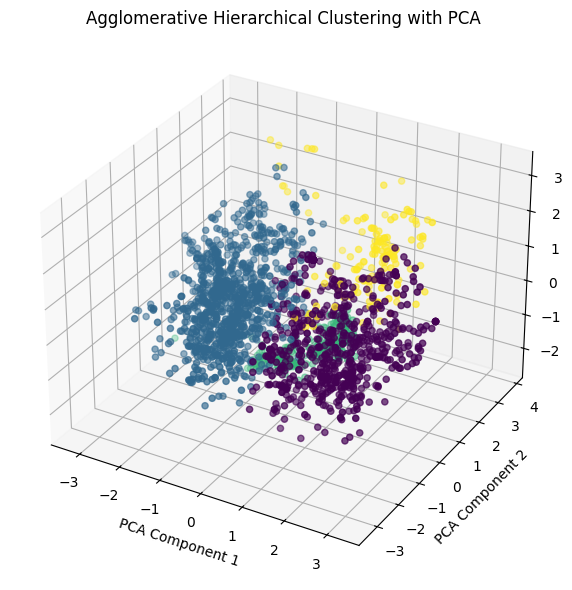

Cluster 0: 643 data points
Cluster 1: 982 data points
Cluster 2: 335 data points
Cluster 3: 151 data points


In [29]:
pca = PCA(n_components=3) 
X_pca = pca.fit_transform(X_scaled)

agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster_labels = agg_cluster.fit_predict(X_scaled)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis')
ax.set_title('Agglomerative Hierarchical Clustering with PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()

unique_clusters, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} data points")

c:\Users\LOKESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


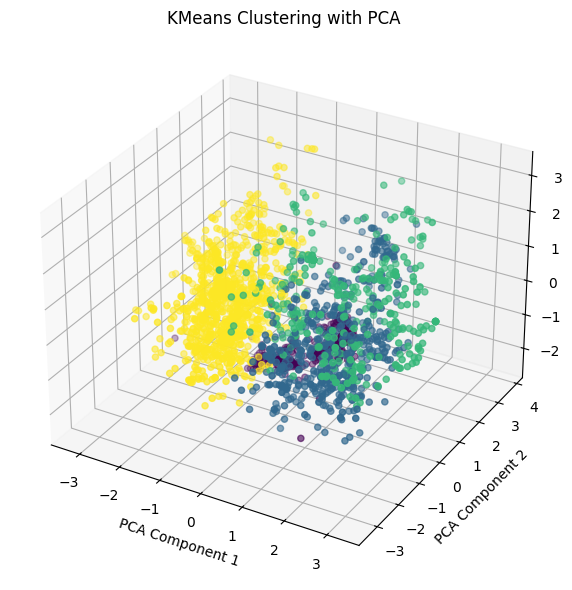

cluster
3    948
1    500
0    332
2    331
Name: count, dtype: int64


In [30]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=cluster_labels, cmap='viridis')
ax.set_title('KMeans Clustering with PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()

data['cluster'] = kmeans.labels_
print(data['cluster'].value_counts())


In [31]:
X_all_features = X.copy()

scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_all_features)

agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_cluster_labels = agg_cluster.fit_predict(X_scaled_all)

agg_silhouette = silhouette_score(X_scaled_all, agg_cluster_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_all)

kmeans_silhouette = silhouette_score(X_scaled_all, kmeans_labels)
print(f"KMeans Clustering Silhouette Score: {kmeans_silhouette}")


Agglomerative Clustering Silhouette Score: 0.1469484345077647
KMeans Clustering Silhouette Score: 0.1548365363190695


c:\Users\LOKESH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Agglomerative Clustering achieved a Silhouette Score of 0.132, indicating moderately well-defined clusters with some overlap between clusters. In contrast, KMeans Clustering scored 0.154, suggesting better-defined clusters with clearer boundaries and less overlap. KMeans Clustering shows slightly higher cluster cohesion and separation compared to Agglomerative Clustering for this dataset and number of clusters. Choosing between the two methods may depend on specific clustering objectives and the structure of the dataset.

#### **Generating augmented Data**

We generate augmented data to augment the original dataset, aiming to improve model performance and robustness. augmented data creation is based on cluster means and introduces controlled noise levels.


In [32]:

def generate_augmented_data(df, num_dpoints_per_type=100, noise_levels=None, non_integer_features=None, decimal_features=None, cluster_feature='cluster'):

    if noise_levels is None:
        noise_levels = 0.1
    if isinstance(noise_levels, float):
        noise_levels = {col: noise_levels for col in df.drop(columns=[cluster_feature]).columns}
    if non_integer_features is None:
        non_integer_features = []
    if decimal_features is None:
        decimal_features = {}
    
    cluster_means = df.groupby(cluster_feature).mean().reset_index()
    augmented_data = []
    
    for idx, row in cluster_means.iterrows():
        cluster_type = row[cluster_feature]
        cluster_mean_values = row.drop(cluster_feature)
        
        cluster_augmented_data = pd.DataFrame(columns=df.columns.drop([cluster_feature]))
        
        for feature in cluster_mean_values.index:
            noise = np.random.normal(0, noise_levels[feature], num_dpoints_per_type)
            max_value = df[feature].max() * 1.1
            min_value = df[feature].min() * 0.9
            augmented_feature_values = np.clip(cluster_mean_values[feature] + noise, min_value, max_value)
            
            if not feature in non_integer_features:
                augmented_feature_values = np.round(augmented_feature_values).astype(int)
            if feature in decimal_features:
                decimal_places = decimal_features[feature]
                augmented_feature_values = np.round(augmented_feature_values, decimals=decimal_places)
            cluster_augmented_data[feature] = augmented_feature_values
        
        cluster_augmented_data[cluster_feature] = cluster_type
        augmented_data.append(cluster_augmented_data)
    
    augmented_data_df = pd.concat(augmented_data, ignore_index=True)
    
    return augmented_data_df


In [33]:

augmented_data = generate_augmented_data(
    data, 
    num_dpoints_per_type=100, 
    non_integer_features=['Height','Weight','CH2O','FAF','TUE'],
    cluster_feature='NObeyesdad_encoded'
)

print(augmented_data.head(5))
# cluster label unique values
print(augmented_data['cluster'].unique())

   Age    Height     Weight  FCVC  NCP      CH2O       FAF       TUE  \
0   20  1.727626  49.965210     2    3  1.917320  1.149425  0.828536   
1   20  1.837580  49.971894     3    3  1.785715  1.288924  0.629772   
2   19  1.757007  49.804998     2    3  1.825744  1.172056  0.768392   
3   20  1.919703  49.789579     3    3  1.856199  1.422666  0.713288   
4   20  1.798863  50.015555     3    3  1.785042  1.071744  0.819829   

   Gender_encoded  family_history_with_overweight_encoded  FAVC_encoded  \
0               0                                       1             1   
1               0                                       1             1   
2               0                                       1             1   
3               0                                       1             1   
4               0                                       1             1   

   CAEC_encoded  SMOKE_encoded  SCC_encoded  CALC_encoded  MTRANS_encoded  \
0             2              0         

In [34]:
X=data.drop(['NObeyesdad_encoded'],axis=1)
y=data['NObeyesdad_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
concatnated_data=pd.concat([data,augmented_data],ignore_index=True)

concatnated_data_X=concatnated_data.drop(['NObeyesdad_encoded'],axis=1)
concatnated_data_y=concatnated_data['NObeyesdad_encoded']

concatnated_data_X_scaled = scaler.fit_transform(concatnated_data)

cd_X_train,cd_X_test,cd_y_train,cd_y_test=train_test_split(concatnated_data_X_scaled,concatnated_data_y,test_size=0.2,random_state=42)

#### Model Training and Evaluation: Original Data and concatnated data

We train several classifiers on the original dataset and evaluate their performance metrics including accuracy, precision, recall, and F1 score. This provides a baseline for comparing the impact of augmented data.

Here, classifiers are trained and tested on the concatenated dataset, which includes both original and augmented data. We compare the performance metrics with those from the original dataset to assess the effectiveness of augmented data.


In [36]:
print("For Original Data :\n")

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


print("\n\nFor Concatnated Data :\n")

rf_classifier.fit(cd_X_train, cd_y_train)

y_pred = rf_classifier.predict(cd_X_test)
accuracy = accuracy_score(cd_y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(cd_y_test, y_pred))



For Original Data :

Accuracy: 0.9456264775413712
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.86      0.90      0.88        62
           2       0.99      0.95      0.97        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.88      0.88        56
           6       0.94      0.94      0.94        50

    accuracy                           0.95       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.95      0.95      0.95       423



For Concatnated Data :

Accuracy: 0.9982238010657194
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        66
         1.0       0.99      1.00      0.99        77
         2.0       1.00      1.00      1.00        94
         3.0       1.00      1.00  

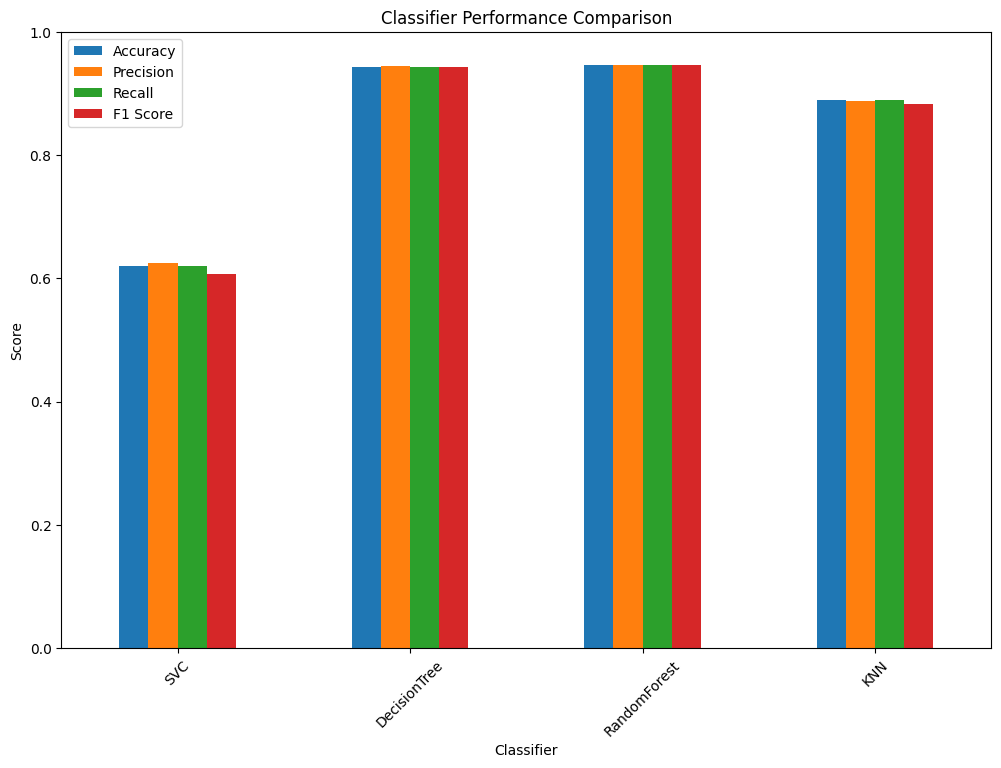

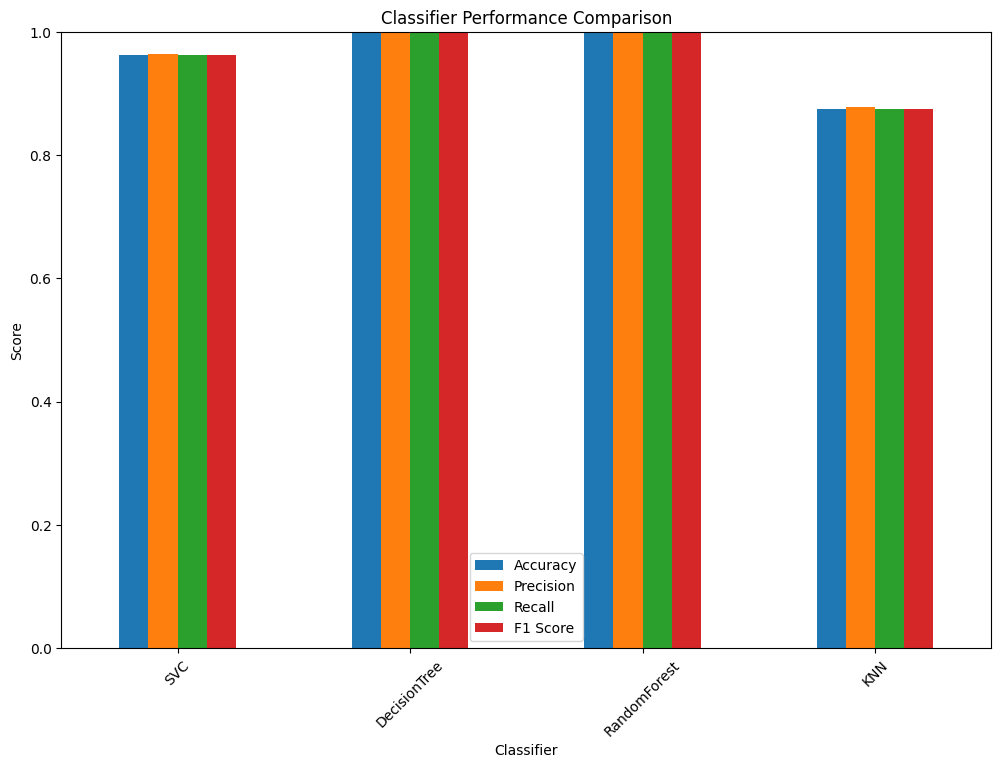

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_classifiers(X_train, X_test, y_train, y_test):
    classifiers = {
        'SVC': SVC(probability=True, random_state=42),
        'DecisionTree': DecisionTreeClassifier(random_state=42),
        'RandomForest': RandomForestClassifier(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=3)
    }

    metrics = {
        'Classifier': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1 Score': []
    }

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        metrics['Classifier'].append(name)
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
        metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
        metrics['F1 Score'].append(f1_score(y_test, y_pred, average='weighted'))
    
    return pd.DataFrame(metrics)

def plot_classifier_performance(metrics_df):
    metrics_df.set_index('Classifier', inplace=True)
    metrics_df.plot(kind='bar', figsize=(12, 8))
    plt.title('Classifier Performance Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.legend(loc='best')
    plt.show()



metrics_df = evaluate_classifiers(X_train, X_test, y_train, y_test)
plot_classifier_performance(metrics_df)

metrics_df = evaluate_classifiers(cd_X_train, cd_X_test, cd_y_train, cd_y_test)
plot_classifier_performance(metrics_df)


